In [42]:
import pandas as pd
import numpy as np
import scipy.stats

In [43]:
irscrs_2002 = pd.read_excel("../데이터자료/all.xlsx")
ktb = pd.read_excel("../데이터자료/ALL_2002_국고채.xlsx")
df = pd.read_excel("../데이터자료/join_data.xlsx")
ktb_2002 = ktb[["DateTime","국고1년","국고3년","국고5년","국고10년","통안1년","통안2년"]]

In [44]:
df

,Unnamed: 0,DateTime,종가_ex,대비_ex,증감률_ex,1Y_Mid_irs,1Y_전일비_irs,2Y_Mid_irs,2Y_전일비_irs,3Y_Mid_irs,...,Bid_ndf,Ask_ndf,Mid_ndf,전일비_ndf,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,M1_스왑포인트
0,0,2012-08-01,1126.5,-4.1,-0.36,2.850,-0.03,2.740,-0.03,2.740,...,1132.0,1132.5,1132.25,NaN,-76.0,-92.5,-93.0,-105.0,-108.0,260
1,1,2012-08-02,1131.7,5.2,0.46,2.820,-0.03,2.690,-0.05,2.690,...,1133.5,1134.5,1134.00,1.75,-74.0,-84.5,-84.0,-96.0,-99.0,250
2,2,2012-08-03,1134.8,3.1,0.27,2.790,-0.03,2.660,-0.03,2.660,...,1137.5,1138.5,1138.00,4.00,-72.0,-83.0,-83.0,-101.0,-112.0,240
3,3,2012-08-06,1129.0,-5.8,-0.51,2.810,0.02,2.680,0.02,2.680,...,1128.0,1129.0,1128.50,-9.50,-74.0,-87.5,-88.0,-107.0,-117.0,240
4,4,2012-08-07,1128.8,-0.2,-0.02,2.820,0.01,2.680,0.00,2.680,...,1128.5,1129.5,1129.00,0.50,-73.0,-86.0,-88.0,-115.0,-127.0,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2455,2022-07-25,1313.7,0.7,0.05,3.165,-0.04,3.235,-0.08,3.205,...,1309.7,1310.0,1309.85,3.35,-61.5,-50.5,-49.5,-61.5,-60.5,-60
2456,2456,2022-07-26,1307.6,-6.1,-0.47,3.155,-0.01,3.215,-0.02,3.175,...,1310.9,1311.1,1311.00,1.15,-59.5,-51.5,-49.5,-60.5,-59.5,-70
2457,2457,2022-07-27,1313.3,5.7,0.43,3.145,-0.01,3.165,-0.05,3.115,...,1310.4,1310.6,1310.50,-0.50,-57.5,-47.5,-44.5,-55.5,-54.5,-55
2458,2458,2022-07-28,1296.1,-17.2,-1.33,3.175,0.03,3.205,0.04,3.165,...,1305.8,1306.2,1306.00,-4.50,-56.5,-47.5,-45.5,-57.5,-59.5,-65


In [45]:
# 2012년 8월 2일 부터 2022년 7월 31일 까지의 데이터 대비 값 구하기 
df["전일대비_종가_ex"] = df["종가_ex"] - df["종가_ex"].shift(1)
df["등락률_종가_ex"] = df["종가_ex"] - df["종가_ex"].shift(1) 
df["대비_1Y_irs"] = df["1Y_Mid_irs"] - df["1Y_Mid_irs"].shift(1) 
df["대비_2Y_irs"] = df["2Y_Mid_irs"] - df["2Y_Mid_irs"].shift(1) 
df["대비_3Y_irs"] = df["3Y_Mid_irs"] - df["3Y_Mid_irs"].shift(1) 
df["대비_5Y_irs"] = df["5Y_Mid_irs"] - df["5Y_Mid_irs"].shift(1) 
df["대비_10Y_irs"] =df["10Y_Mid_irs"] - df["10Y_Mid_irs"].shift(1) 
df["대비_1Y_crs"] = df["1Y_Mid_crs"] - df["1Y_Mid_crs"].shift(1) 
df["대비_2Y_crs"] = df["2Y_Mid_crs"] - df["2Y_Mid_crs"].shift(1) 
df["대비_3Y_crs"] = df["3Y_Mid_crs"] - df["3Y_Mid_crs"].shift(1) 
df["대비_5Y_crs"] = df["5Y_Mid_crs"] - df["5Y_Mid_crs"].shift(1) 
df["대비_10Y_crs"] =df["10Y_Mid_crs"] - df["10Y_Mid_crs"].shift(1) 
df["대비_국고_1Y"] =df["국고1년"]-df["국고1년"].shift(1)
df["대비_국고_3Y"] =df["국고3년"]-df["국고3년"].shift(1)
df["대비_국고_5Y"] =df["국고5년"]-df["국고5년"].shift(1)
df["대비_국고_10Y"] =df["국고10년"]-df["국고10년"].shift(1)
df["대비_통안_1Y"] = df["통안364일"] - df["통안364일"].shift(1)
df["대비_통안_2Y"] = df["통안2년"] - df["통안2년"].shift(1)
df["대비_swapbasis_1Y"] =df["1Y_베이시스"] - df["1Y_베이시스"].shift(1) 
df["대비_swapbasis_2Y"] =df["2Y_베이시스"] - df["2Y_베이시스"].shift(1) 
df["대비_swapbasis_3Y"] =df["3Y_베이시스"] - df["3Y_베이시스"].shift(1) 
df["대비_swapbasis_5Y"] =df["5Y_베이시스"] - df["5Y_베이시스"].shift(1) 
df["대비_swapbasis_10Y"] =df["10Y_베이시스"] - df["10Y_베이시스"].shift(1) 
df["전일종가_ex"] = df["종가_ex"].shift(1)
df["종가_NDF_차이"] = df["전일종가_ex"] -df["Mid_ndf"]
df["대비_ndf"] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df["스왑포인트_1M"] = df["M1_스왑포인트"]/100
df = df.dropna()


In [46]:
#2002년 8월1일부터 2012년 7월 31일까지 irs , crs, 베이시스 대비 구하기
irscrs_2002["대비_1Y_irs"] = irscrs_2002["IRS_1Y_Mid"] - irscrs_2002["IRS_1Y_Mid"].shift(1) 
irscrs_2002["대비_2Y_irs"] = irscrs_2002['IRS_2Y_Mid'] - irscrs_2002['IRS_2Y_Mid'].shift(1) 
irscrs_2002["대비_3Y_irs"] = irscrs_2002['IRS_3Y_Mid'] - irscrs_2002['IRS_3Y_Mid'].shift(1) 
irscrs_2002["대비_5Y_irs"] = irscrs_2002['IRS_5Y_Mid'] - irscrs_2002['IRS_5Y_Mid'].shift(1) 
irscrs_2002["대비_10Y_irs"] = irscrs_2002["IRS_10Y_Mid"] - irscrs_2002["IRS_10Y_Mid"].shift(1) 
irscrs_2002["대비_1Y_crs"] = irscrs_2002['CRS_1Y_Mid'] - irscrs_2002['CRS_1Y_Mid'].shift(1) 
irscrs_2002["대비_2Y_crs"] = irscrs_2002['CRS_2Y_Mid'] - irscrs_2002['CRS_2Y_Mid'].shift(1) 
irscrs_2002["대비_3Y_crs"] = irscrs_2002['CRS_3Y_Mid'] - irscrs_2002['CRS_3Y_Mid'].shift(1) 
irscrs_2002["대비_5Y_crs"] = irscrs_2002['CRS_5Y_Mid'] - irscrs_2002['CRS_5Y_Mid'].shift(1) 
irscrs_2002["대비_10Y_crs"] = irscrs_2002['CRS_10Y_Mid'] - irscrs_2002['CRS_10Y_Mid'].shift(1)

irscrs_2002["대비_swapbasis_1Y"] = irscrs_2002["1Y_베이시스"] - irscrs_2002["1Y_베이시스"].shift(1) 
irscrs_2002["대비_swapbasis_2Y"] = irscrs_2002["2Y_베이시스"] - irscrs_2002["2Y_베이시스"].shift(1) 
irscrs_2002["대비_swapbasis_3Y"] = irscrs_2002["3Y_베이시스"] - irscrs_2002["3Y_베이시스"].shift(1) 
irscrs_2002["대비_swapbasis_5Y"] = irscrs_2002["5Y_베이시스"] - irscrs_2002["5Y_베이시스"].shift(1) 
irscrs_2002["대비_swapbasis_10Y"] = irscrs_2002["10Y_베이시스"] - irscrs_2002["10Y_베이시스"].shift(1) 

#2002년 8월1일부터 2012년 7월 31일까지 국고채 통안채 대비 구하기
ktb_2002['대비_국고_1Y'] = ktb_2002["국고1년"] - ktb_2002["국고1년"].shift(1)
ktb_2002['대비_국고_3Y'] = ktb_2002["국고3년"] - ktb_2002["국고3년"].shift(1)
ktb_2002['대비_국고_5Y'] = ktb_2002["국고5년"] - ktb_2002["국고5년"].shift(1)
ktb_2002['대비_국고_10Y'] = ktb_2002["국고10년"] - ktb_2002["국고10년"].shift(1)
ktb_2002['대비_통안_1Y'] = ktb_2002["통안1년"] - ktb_2002["통안1년"].shift(1)
ktb_2002['대비_통안_2Y'] = ktb_2002["통안2년"] - ktb_2002["통안2년"].shift(1)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\264415683.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ktb_2002['대비_국고_1Y'] = ktb_2002["국고1년"] - ktb_2002["국고1년"].shift(1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\264415683.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ktb_2002['대비_국고_3Y'] = ktb_2002["국고3년"] - ktb_2002["국고3년"].shift(1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\264415683.py:22: SettingWithCopyWarning: 
A value is trying to be s

In [47]:
# 대비 값들만 데이터 프레임으로 만들기
# 2012 년도 irs, crs, 베이시스
irscrs_2012 = df[['DateTime','대비_1Y_irs', '대비_2Y_irs', '대비_3Y_irs', '대비_5Y_irs', '대비_10Y_irs',
       '대비_1Y_crs', '대비_2Y_crs', '대비_3Y_crs', '대비_5Y_crs', '대비_10Y_crs','대비_swapbasis_1Y',
       '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y']]

# 2002 년도 irs, crs, 베이시스
irscrs_2002 = irscrs_2002[['DateTime', '대비_1Y_irs', '대비_2Y_irs', '대비_3Y_irs', '대비_5Y_irs','대비_10Y_irs', '대비_1Y_crs', '대비_2Y_crs', '대비_3Y_crs', '대비_5Y_crs','대비_10Y_crs', '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y']]

# 2012 년도 irs, crs, 베이시스
ktb_2012 = df[['DateTime', '대비_국고_1Y',
       '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y']]

# 2002 년도 irs, crs, 베이시스
ktb_2002 = ktb_2002[['DateTime','대비_국고_1Y',
       '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y']]


In [48]:
# concat으로 데이터 합치기 irs crs 합치기
irscrs_all = pd.concat([irscrs_2002,irscrs_2012], axis = 0)
irscrs_all=irscrs_all.dropna()
irscrs_all=irscrs_all.reset_index()

In [49]:
# concat으로 데이터 합치기 ktb 합치기
ktb_all = pd.concat([ktb_2002,ktb_2012], axis = 0)
# ktb_all=ktb_all.dropna()
ktb_all=ktb_all.reset_index()
ktb_all.head()

,index,DateTime,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y
0,0,2002-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-08-02 00:00:00,-0.07,-0.09,-0.08,NaN,-0.07,-0.09
2,2,2002-08-05 00:00:00,-0.09,-0.13,-0.21,NaN,-0.09,-0.14
3,3,2002-08-06 00:00:00,0.05,0.06,0.05,NaN,0.05,0.05
4,4,2002-08-07 00:00:00,-0.02,-0.02,-0.05,NaN,-0.02,0.00


In [50]:
#시간데이터 일치화
irscrs_all["DateTime"] = pd.to_datetime(irscrs_all["DateTime"], format="%Y-%m-%d")
irscrs_all["DateTime"] = irscrs_all["DateTime"].dt.strftime('%Y-%m-%d')
# irscrs_all.set_index("DataTime", inplace=True)
# irscrs_all["DateTime"] = pd.to_datetime(irscrs_all["DateTime"], "yyyy-MM-dd")
irscrs_all

,index,DateTime,대비_1Y_irs,대비_2Y_irs,대비_3Y_irs,대비_5Y_irs,대비_10Y_irs,대비_1Y_crs,대비_2Y_crs,대비_3Y_crs,대비_5Y_crs,대비_10Y_crs,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y
0,1,2002-08-02,-0.05,-0.08,-0.07,-0.05,-0.07,-0.06,-0.08,-0.07,-0.04,-0.08,-1.0,0.0,0.0,1.0,-1.0
1,2,2002-08-05,-0.12,-0.13,-0.14,-0.15,-0.15,-0.13,-0.13,-0.13,-0.15,-0.15,-1.0,0.0,1.0,0.0,0.0
2,3,2002-08-06,0.07,0.08,0.09,0.07,0.07,0.10,0.09,0.09,0.06,0.07,3.0,1.0,0.0,-1.0,0.0
3,4,2002-08-07,-0.04,-0.01,-0.02,-0.04,-0.06,-0.04,-0.01,-0.02,-0.03,-0.05,0.0,0.0,0.0,1.0,1.0
4,5,2002-08-08,0.02,-0.02,-0.02,-0.01,0.00,0.01,-0.02,-0.02,-0.01,0.00,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2455,2022-07-25,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.09,-0.07,-0.11,-0.11,-4.0,-1.0,0.0,-2.0,0.0
4947,2456,2022-07-26,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.03,-0.03,-0.02,-0.02,2.0,-1.0,0.0,1.0,1.0
4948,2457,2022-07-27,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.01,-0.01,-0.01,-0.01,2.0,4.0,5.0,5.0,5.0
4949,2458,2022-07-28,0.03,0.04,0.05,0.05,0.07,0.04,0.04,0.04,0.03,0.02,1.0,0.0,-1.0,-2.0,-5.0


In [51]:
#시간데이터 일치화
ktb_all["DateTime"] = pd.to_datetime(ktb_all["DateTime"], format="%Y-%m-%d")
ktb_all["DateTime"] = ktb_all["DateTime"].dt.strftime('%Y-%m-%d')
# ktb_all.set_index("DataTime", inplace=True)
# ktb_all["DateTime"] = pd.to_datetime(ktb_all["DateTime"], "yyyy-MM-dd")
ktb_all

,index,DateTime,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y
0,0,2002-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-08-02,-0.07,-0.09,-0.08,NaN,-0.07,-0.09
2,2,2002-08-05,-0.09,-0.13,-0.21,NaN,-0.09,-0.14
3,3,2002-08-06,0.05,0.06,0.05,NaN,0.05,0.05
4,4,2002-08-07,-0.02,-0.02,-0.05,NaN,-0.02,0.00
...,...,...,...,...,...,...,...,...
4947,2455,2022-07-25,-0.02,-0.06,-0.07,-0.09,-0.01,-0.05
4948,2456,2022-07-26,0.01,-0.03,-0.02,-0.03,0.01,0.00
4949,2457,2022-07-27,0.00,-0.03,-0.05,-0.06,0.02,-0.01
4950,2458,2022-07-28,0.01,0.04,0.03,0.08,0.02,0.03


In [52]:
#시간데이터 일치화 및 종속변수 데이터프레임 생성
df_exchange = df[["DateTime", "종가_ex", "등락률_종가_ex", "전일대비_종가_ex"]]
df_exchange["DateTime"] = pd.to_datetime(df_exchange["DateTime"], format="%Y-%m-%d")
df_exchange["DateTime"] = df_exchange["DateTime"].dt.strftime('%Y-%m-%d')
df_exchange=df_exchange.reset_index()
df_exchange

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\504527189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exchange["DateTime"] = pd.to_datetime(df_exchange["DateTime"], format="%Y-%m-%d")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\504527189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exchange["DateTime"] = df_exchange["DateTime"].dt.strftime('%Y-%m-%d')


,index,DateTime,종가_ex,등락률_종가_ex,전일대비_종가_ex
0,1,2012-08-02,1131.7,5.2,5.2
1,2,2012-08-03,1134.8,3.1,3.1
2,3,2012-08-06,1129.0,-5.8,-5.8
3,4,2012-08-07,1128.8,-0.2,-0.2
4,5,2012-08-08,1128.3,-0.5,-0.5
...,...,...,...,...,...
2454,2455,2022-07-25,1313.7,0.7,0.7
2455,2456,2022-07-26,1307.6,-6.1,-6.1
2456,2457,2022-07-27,1313.3,5.7,5.7
2457,2458,2022-07-28,1296.1,-17.2,-17.2


In [53]:
#각 독립변수들 데이터프레임 생성
df_irs2012_1Y = irscrs_all[["DateTime","대비_1Y_irs"]]
df_irs2012_2Y = irscrs_all[["DateTime","대비_2Y_irs"]]
df_irs2012_3Y = irscrs_all[["DateTime","대비_3Y_irs"]]
df_irs2012_5Y = irscrs_all[["DateTime","대비_5Y_irs"]]
df_irs2012_10Y = irscrs_all[["DateTime","대비_10Y_irs"]]
df_crs2012_1Y = irscrs_all[["DateTime","대비_1Y_crs"]]
df_crs2012_2Y = irscrs_all[["DateTime","대비_2Y_crs"]]
df_crs2012_3Y = irscrs_all[["DateTime","대비_3Y_crs"]]
df_crs2012_5Y = irscrs_all[["DateTime","대비_5Y_crs"]]
df_crs2012_10Y = irscrs_all[["DateTime","대비_10Y_crs"]]
df_sb2012_1Y = irscrs_all[["DateTime","대비_swapbasis_1Y"]]
df_sb2012_2Y = irscrs_all[["DateTime","대비_swapbasis_2Y"]]
df_sb2012_3Y = irscrs_all[["DateTime","대비_swapbasis_3Y"]]
df_sb2012_5Y = irscrs_all[["DateTime","대비_swapbasis_5Y"]]
df_sb2012_10Y = irscrs_all[["DateTime","대비_swapbasis_10Y"]]
df_ktb_1Y = ktb_all[["DateTime",'대비_국고_1Y']]
df_ktb_3Y = ktb_all[["DateTime",'대비_국고_3Y']]
df_ktb_5Y = ktb_all[["DateTime",'대비_국고_5Y']]
df_ktb_10Y = ktb_all[["DateTime",'대비_국고_10Y']]
df_ktbT_1Y = ktb_all[["DateTime",'대비_통안_1Y']]
df_ktbT_2Y = ktb_all[["DateTime",'대비_통안_2Y']]



In [54]:
#ktb는 결측치가 많아서 따로 dropna해줌
df_ktb_1Y=df_ktb_1Y.dropna()
df_ktb_3Y=df_ktb_3Y.dropna()
df_ktb_5Y=df_ktb_5Y.dropna()
df_ktb_10Y=df_ktb_10Y.dropna()
df_ktbT_1Y=df_ktbT_1Y.dropna()
df_ktbT_2Y=df_ktbT_2Y.dropna()
df_ktb_1Y

,DateTime,대비_국고_1Y
1,2002-08-02,-0.07
2,2002-08-05,-0.09
3,2002-08-06,0.05
4,2002-08-07,-0.02
5,2002-08-08,0.00
...,...,...
4947,2022-07-25,-0.02
4948,2022-07-26,0.01
4949,2022-07-27,0.00
4950,2022-07-28,0.01


In [55]:
# 데이터에대한 범위를 정해주기 위한 인덱스값 확인
print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2002-08-02"])
# print(df_irs2012_1Y.loc[df_crs2012_1Y["DateTime"] == "2011-08-01"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2012-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2013-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2014-08-05"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2015-08-06"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2016-08-08"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2017-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2018-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2019-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2020-08-05"])
print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2012-06-15"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2022-07-29"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2017-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2018-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2019-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2020-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2021-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2022-07-20"])

     DateTime  대비_1Y_irs
0  2002-08-02      -0.05
        DateTime  대비_1Y_irs
2459  2012-06-15      -0.02


In [56]:
# 데이터에대한 범위를 정해주기 위한 인덱스값 확인
print(df_exchange.loc[df_exchange["DateTime"] == "2012-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2013-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2014-08-05"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2015-08-04"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2016-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2017-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2018-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2019-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2021-07-20"])
print(df_exchange.loc[df_exchange["DateTime"] == "2022-07-22"])

   index    DateTime   종가_ex  등락률_종가_ex  전일대비_종가_ex
0      1  2012-08-02  1131.7        5.2         5.2
      index    DateTime   종가_ex  등락률_종가_ex  전일대비_종가_ex
2453   2454  2022-07-22  1313.0        5.3         5.3


In [57]:
# 상관분석을 할 환율전일대비 데이터만 남기기
df_exchange = df_exchange["전일대비_종가_ex"]
df_exchange = pd.DataFrame(df_exchange)
df_exchange =df_exchange.reset_index(drop=True)
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   전일대비_종가_ex  2459 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [58]:
# df_irs2012_1Y_1 = df_irs2012_1Y["전일비_1Y_irs"].iloc[2242:4701]
# df_irs2012_1Y = pd.DataFrame(df_irs2012_1Y)
# df_irs2012_1Y = df_irs2012_1Y.reset_index(drop=True)
# df_irs2012_1Y_1.info()

In [59]:
#irs1년물에 대한 시차 상관분석 
a_irs_1Y = []

for i in df_exchange.index:
   # df_irs2012_1Y의 인덱스 4700~4951 개수
   if i<= 251 :
      
      #df_irs2012_1Y["대비_1Y_irs"].iloc[2241]은 2012년 08월 01일 1년전 데이터 iloc[4700] 데이터 개수를 맞춰주기위한 2241+2458 계산
      df_1 =df_irs2012_1Y["대비_1Y_irs"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      # 상관분석
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_1Y_irs"])
      a_irs_1Y.append(cor[0].round(4)) 
      
   else :
      break
a_irs_1Y


[-0.0178,
 0.0026,
 0.0261,
 0.0272,
 0.0234,
 0.0044,
 -0.0013,
 0.0102,
 -0.014,
 0.0037,
 0.0075,
 -0.0006,
 0.0108,
 -0.0116,
 0.0234,
 -0.012,
 -0.0083,
 0.0019,
 0.0125,
 0.013,
 -0.0131,
 -0.0113,
 0.0133,
 -0.0148,
 -0.0113,
 -0.0167,
 0.0366,
 -0.0161,
 -0.0218,
 -0.0174,
 0.0146,
 0.0037,
 -0.0299,
 0.0234,
 0.0243,
 -0.0429,
 0.0102,
 0.0,
 0.0197,
 -0.0174,
 0.0148,
 0.0041,
 0.0089,
 -0.0415,
 0.002,
 -0.0216,
 0.0116,
 -0.0483,
 0.0167,
 -0.0134,
 -0.0127,
 0.0365,
 0.0011,
 -0.0148,
 0.0192,
 -0.0299,
 -0.0006,
 0.0354,
 -0.0043,
 0.0065,
 -0.0109,
 0.0045,
 0.0189,
 -0.0154,
 0.0018,
 0.0383,
 -0.0473,
 0.0014,
 -0.0185,
 0.0411,
 -0.026,
 0.027,
 -0.0236,
 0.0234,
 -0.0046,
 -0.007,
 -0.0114,
 -0.0054,
 -0.0231,
 0.0153,
 0.008,
 -0.0198,
 0.0429,
 -0.015,
 0.0199,
 -0.0322,
 0.0083,
 0.01,
 -0.0245,
 -0.0158,
 0.039,
 -0.0163,
 0.0085,
 0.0047,
 -0.011,
 -0.0321,
 0.0107,
 -0.0165,
 0.0236,
 -0.006,
 0.0196,
 0.011,
 0.006,
 0.0069,
 0.0103,
 -0.0138,
 0.0146,
 0.0352

In [60]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_1Y_IRS_cor = pd.DataFrame(a_irs_1Y)
df_1Y_IRS_cor.columns=["cor"]
df_1Y_IRS_cor.describe()


,cor
count,252.000000
mean,0.001500
std,0.019283
min,-0.048300
25%,-0.013850
50%,0.003700
75%,0.014225
max,0.048000


In [61]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_1Y_IRS_cor.loc[df_1Y_IRS_cor["cor"] == -0.0483])


       cor
47 -0.0483


In [62]:
# 데이터 수정을 위한 데이터 프레임화
df_irs2012_1Y =df_irs2012_1Y.reset_index(drop=True)
df_irs2012_1Y

,DateTime,대비_1Y_irs
0,2002-08-02,-0.05
1,2002-08-05,-0.12
2,2002-08-06,0.07
3,2002-08-07,-0.04
4,2002-08-08,0.02
...,...,...
4946,2022-07-25,-0.04
4947,2022-07-26,-0.01
4948,2022-07-27,-0.01
4949,2022-07-28,0.03


In [63]:
#crs1년물에 대한 시차 상관분석 
a_crs_1Y = []

for i in df_exchange.index:
   # df_crs2012_1Y의 인덱스 4700~4951 개수
   if i<= 251 :
      
      #df_crs2012_1Y["대비_1Y_crs"].iloc[2241]은 2012년 08월 01일 1년전 데이터 iloc[4700] 데이터 개수를 맞춰주기위한 2241+2459 계산
      df_1 =df_crs2012_1Y["대비_1Y_crs"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_1Y_crs"])
      a_crs_1Y.append(cor[0].round(4)) 
              
   else :
      break
a_crs_1Y

[0.0007,
 0.0058,
 0.0441,
 0.0207,
 0.0207,
 -0.025,
 0.0227,
 -0.0165,
 -0.013,
 0.0025,
 0.0137,
 -0.0279,
 0.0037,
 0.0192,
 -0.0177,
 -0.001,
 -0.0012,
 0.0112,
 0.0197,
 -0.0359,
 0.0031,
 -0.0212,
 0.0209,
 -0.0061,
 -0.0056,
 0.0044,
 -0.0116,
 0.038,
 -0.0446,
 -0.0002,
 0.0019,
 0.0073,
 -0.0128,
 0.0042,
 0.0052,
 -0.0277,
 -0.0046,
 0.0162,
 -0.0082,
 0.028,
 -0.0235,
 0.0175,
 0.0057,
 -0.009,
 0.0049,
 -0.0102,
 -0.0004,
 -0.0157,
 -0.0189,
 -0.0348,
 0.021,
 0.0379,
 0.0124,
 0.0067,
 0.0025,
 -0.0031,
 0.0041,
 -0.0128,
 0.0059,
 0.0017,
 -0.0276,
 -0.0117,
 -0.0011,
 0.0055,
 -0.0181,
 0.0378,
 -0.0023,
 -0.0095,
 0.004,
 0.0011,
 -0.0097,
 -0.0041,
 0.0072,
 -0.005,
 0.0088,
 -0.0326,
 0.0006,
 0.0209,
 -0.0004,
 0.0178,
 -0.0046,
 -0.017,
 0.0175,
 -0.0041,
 0.0144,
 -0.002,
 0.0139,
 -0.034,
 0.0082,
 -0.0098,
 -0.0004,
 0.0434,
 -0.0056,
 0.0068,
 -0.0115,
 -0.0081,
 0.0053,
 -0.0095,
 0.0096,
 -0.0264,
 0.0358,
 -0.0092,
 0.0206,
 0.0134,
 -0.0141,
 -0.0015,
 -0.0

In [64]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_1Y_CRS_cor = pd.DataFrame(a_crs_1Y)
df_1Y_CRS_cor.columns=["cor"]
df_1Y_CRS_cor.describe()

,cor
count,252.000000
mean,-0.000031
std,0.028134
min,-0.264300
25%,-0.011525
50%,0.001600
75%,0.014025
max,0.116300


In [65]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_1Y_CRS_cor.loc[df_1Y_CRS_cor["cor"] == -0.2643])

        cor
251 -0.2643


In [66]:
#베이시스 스왑 1년물에 대한 시차 상관분석 
a_sb_1Y = []

for i in df_exchange.index:
   # df_sb2012_1Y의 인덱스 4700~4951 개수
   if i<= 251 :
      
      #df_sb2012_1Y["대비_swapbasis_1Y"].iloc[2241]은 2012년 08월 01일 1년전 데이터 iloc[4700] 데이터 개수를 맞춰주기위한 2241+2459 계산
      df_1 =df_sb2012_1Y["대비_swapbasis_1Y"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_swapbasis_1Y"])
      a_sb_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_sb_1Y

[0.0101,
 0.0039,
 0.0261,
 0.0042,
 0.0063,
 -0.0251,
 0.0213,
 -0.0204,
 -0.0042,
 0.0003,
 0.0084,
 -0.0249,
 -0.0024,
 0.0236,
 -0.0285,
 0.0055,
 0.0034,
 0.0091,
 0.0111,
 -0.0393,
 0.0098,
 -0.0131,
 0.0116,
 0.0025,
 0.001,
 0.013,
 -0.0301,
 0.043,
 -0.0285,
 0.0091,
 -0.0062,
 0.0046,
 0.0046,
 -0.0089,
 -0.0085,
 -0.0017,
 -0.0097,
 0.0145,
 -0.018,
 0.0346,
 -0.0291,
 0.0135,
 0.0002,
 0.0145,
 0.0033,
 0.0026,
 -0.0067,
 0.0124,
 -0.026,
 -0.0238,
 0.0257,
 0.0139,
 0.0105,
 0.0141,
 -0.0083,
 0.0136,
 0.004,
 -0.0309,
 0.0076,
 -0.0021,
 -0.0187,
 -0.0129,
 -0.0114,
 0.0133,
 -0.0171,
 0.0127,
 0.024,
 -0.0093,
 0.0138,
 -0.0217,
 0.0057,
 -0.0186,
 0.0194,
 -0.0173,
 0.0104,
 -0.0252,
 0.0068,
 0.0216,
 0.0124,
 0.0074,
 -0.0086,
 -0.0042,
 -0.008,
 0.0046,
 0.0018,
 0.016,
 0.0078,
 -0.0358,
 0.0209,
 0.0001,
 -0.0219,
 0.0477,
 -0.0097,
 0.0035,
 -0.0042,
 0.0106,
 -0.0011,
 0.0007,
 -0.0045,
 -0.0202,
 0.0211,
 -0.0143,
 0.0151,
 0.0081,
 -0.0183,
 0.0063,
 -0.016,
 -

In [67]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_1Y_SB_cor = pd.DataFrame(a_sb_1Y)
df_1Y_SB_cor.columns=["cor"]
df_1Y_SB_cor.describe()

,cor
count,252.000000
mean,-0.000886
std,0.025883
min,-0.234100
25%,-0.013125
50%,0.001600
75%,0.013075
max,0.111300


In [68]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_1Y_SB_cor.loc[df_1Y_SB_cor["cor"] == -0.2341])

        cor
251 -0.2341


In [69]:
#국고채 1년물에 대한 시차 상관분석 
a_ktb_1Y = []

for i in df_exchange.index:
   # df_ktb2012_1Y의 인덱스 4700~4951 개수
   if i<= 251 :
      
      #df_ktb_1Y["대비_국고_1Y"].iloc[2241]은 2012년 08월 01일 1년전 데이터 iloc[4700] 데이터 개수를 맞춰주기위한 2241+2459 계산
      df_1 =df_ktb_1Y["대비_국고_1Y"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_국고_1Y"])
      a_ktb_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_1Y

[-0.0128,
 0.0155,
 0.0415,
 0.0288,
 0.0327,
 0.02,
 0.0188,
 -0.0365,
 0.0143,
 -0.0027,
 0.0105,
 0.0033,
 0.0292,
 0.0003,
 -0.0077,
 -0.0006,
 -0.0033,
 -0.0309,
 0.0083,
 0.0169,
 -0.0309,
 0.0025,
 0.0012,
 -0.025,
 -0.0304,
 -0.0187,
 0.0112,
 -0.0041,
 -0.0209,
 -0.0212,
 0.0026,
 -0.0041,
 -0.0075,
 0.0231,
 -0.0119,
 -0.0096,
 0.0279,
 -0.0023,
 0.0127,
 0.0278,
 0.0254,
 -0.0153,
 0.0072,
 -0.0416,
 -0.0177,
 -0.032,
 -0.0313,
 -0.0355,
 0.0034,
 0.0089,
 0.0253,
 0.0347,
 0.0052,
 -0.0018,
 0.0141,
 -0.0434,
 0.014,
 0.0331,
 0.0141,
 0.0135,
 -0.0003,
 0.005,
 -0.0215,
 0.0269,
 -0.0207,
 0.0143,
 -0.028,
 -0.0301,
 0.0331,
 0.0006,
 -0.0423,
 0.0198,
 0.007,
 0.0269,
 0.022,
 -0.018,
 -0.0262,
 0.0174,
 -0.0047,
 -0.0054,
 0.0022,
 0.0002,
 0.0231,
 -0.0111,
 0.0115,
 0.0275,
 -0.0227,
 -0.0125,
 -0.0107,
 -0.0505,
 -0.0011,
 -0.0257,
 0.0717,
 -0.0352,
 -0.0023,
 -0.0032,
 0.0452,
 -0.0079,
 0.0098,
 0.0034,
 0.0145,
 -0.0009,
 -0.0065,
 0.0177,
 0.0205,
 -0.0101,
 -0.0

In [70]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_1Y_KTB_cor = pd.DataFrame(a_ktb_1Y)
df_1Y_KTB_cor.columns=["cor"]
df_1Y_KTB_cor.describe()

,cor
count,252.000000
mean,0.002844
std,0.020735
min,-0.050500
25%,-0.010625
50%,0.003050
75%,0.017150
max,0.071700


In [71]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_1Y_KTB_cor.loc[df_1Y_KTB_cor["cor"] == 0.0717])

       cor
92  0.0717


In [72]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
# [2241+92:4700+92]
df_ktb_1Y =df_ktb_1Y.iloc[2333:4792]

In [73]:
# 데이터 수정을 위한 데이터 프레임화
df_ktb_1Y =df_ktb_1Y.reset_index(drop=True)
df_ktb_1Y

,DateTime,대비_국고_1Y
0,2011-12-13,-0.01
1,2011-12-14,-0.01
2,2011-12-15,-0.01
3,2011-12-16,0.00
4,2011-12-19,0.05
...,...,...
2454,2021-12-01,0.02
2455,2021-12-02,0.01
2456,2021-12-03,0.02
2457,2021-12-06,-0.02


In [74]:
#통안채 1년물에 대한 시차 상관분석 
a_ktbT_1Y = []

# df_ktb2012_1Y의 인덱스 4700~4951 개수
for i in df_exchange.index:
   if i<= 251 :
      
      #df_ktbT_1Y["대비_통안_1Y"].iloc[2241]은 2012년 08월 01일 1년전 데이터 iloc[4700] 데이터 개수를 맞춰주기위한 2241+2459 계산
      df_1 =df_ktbT_1Y["대비_통안_1Y"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_통안_1Y"])
      a_ktbT_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktbT_1Y

[0.0186,
 -0.0144,
 0.0043,
 0.0183,
 -0.0009,
 -0.0057,
 0.0251,
 -0.0444,
 0.0142,
 0.0038,
 -0.0153,
 0.0127,
 0.0048,
 -0.0025,
 0.0125,
 -0.0111,
 -0.0042,
 0.0076,
 -0.0211,
 0.0202,
 -0.0226,
 0.0156,
 -0.0001,
 0.0,
 -0.0164,
 0.0131,
 -0.0316,
 0.0263,
 -0.0201,
 0.0324,
 -0.0294,
 0.0267,
 -0.031,
 0.0249,
 -0.0199,
 0.0066,
 0.0071,
 -0.0014,
 0.0217,
 -0.0089,
 -0.0119,
 0.0108,
 -0.0163,
 0.0032,
 -0.0096,
 -0.005,
 0.0243,
 -0.035,
 0.019,
 -0.0137,
 0.0027,
 -0.0127,
 0.0291,
 -0.008,
 0.0133,
 -0.0168,
 0.0039,
 0.0058,
 0.0039,
 0.0123,
 -0.0085,
 -0.0202,
 -0.0006,
 0.0209,
 -0.0117,
 0.0264,
 -0.0208,
 0.0008,
 -0.0085,
 0.0243,
 -0.0221,
 -0.0061,
 0.0212,
 -0.0013,
 0.0128,
 -0.0219,
 0.0028,
 0.0051,
 0.0095,
 -0.0282,
 0.0229,
 -0.011,
 -0.0138,
 0.0236,
 -0.0144,
 0.0114,
 -0.0132,
 0.0052,
 0.0023,
 0.0167,
 -0.035,
 0.0085,
 -0.008,
 0.0124,
 0.008,
 0.0006,
 -0.0172,
 0.0217,
 -0.0341,
 0.0249,
 0.01,
 -0.0048,
 0.0036,
 0.0016,
 0.009,
 0.0015,
 -0.0307,
 -0

In [75]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_1Y_KTBT_cor = pd.DataFrame(a_ktbT_1Y)
df_1Y_KTBT_cor.columns=["cor"]
df_1Y_KTBT_cor.describe()

,cor
count,252.000000
mean,0.000433
std,0.017885
min,-0.046700
25%,-0.011750
50%,0.001550
75%,0.012425
max,0.051000


In [76]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_1Y_KTBT_cor.loc[df_1Y_KTBT_cor["cor"] == 0.0510])

       cor
151  0.051
239  0.051


In [77]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
df_ktbT_1Y =df_ktbT_1Y.iloc[2392:4851]


In [78]:
# 데이터 수정을 위한 데이터 프레임화
# 2241+151,4700+151
df_ktbT_1Y =df_ktbT_1Y.reset_index(drop=True)
df_ktbT_1Y

,DateTime,대비_통안_1Y
0,2012-03-08,-0.01
1,2012-03-09,0.01
2,2012-03-12,0.00
3,2012-03-13,-0.01
4,2012-03-14,0.01
...,...,...
2454,2022-02-28,0.00
2455,2022-03-02,-0.02
2456,2022-03-03,0.00
2457,2022-03-04,-0.01


In [79]:
#irs 2년물에 대한 시차 상관분석 
a_irs_2Y = []

# df_ktb2012_1Y의 인덱스 4450~4951 개수
for i in df_exchange.index:
   if i<=  501:
      
      #df_df_irs2012_2Y["대비_2Y_irs"].iloc[1991]은 2012년 08월 01일의 2년전 데이터 iloc[4450]는 데이터 개수를 맞춰주기위한 1991+2459 계산
      df_1 =df_irs2012_2Y["대비_2Y_irs"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_2Y_irs"])
      a_irs_2Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_2Y

[0.0131,
 -0.007,
 0.0128,
 -0.0285,
 0.009,
 -0.0029,
 -0.0301,
 0.0336,
 -0.0375,
 0.0169,
 -0.0155,
 0.0134,
 0.0013,
 -0.0147,
 0.0035,
 0.0135,
 -0.0019,
 0.0262,
 -0.0267,
 -0.0053,
 0.0046,
 0.0022,
 0.0166,
 0.0014,
 0.011,
 0.0003,
 -0.0031,
 -0.0192,
 -0.0072,
 -0.0154,
 0.0185,
 -0.0058,
 0.0275,
 -0.0127,
 0.0454,
 -0.0249,
 0.0093,
 -0.0388,
 0.0261,
 -0.0072,
 0.0135,
 -0.0089,
 -0.0139,
 0.0066,
 0.0026,
 -0.0056,
 0.0091,
 -0.0228,
 0.011,
 0.0209,
 0.0121,
 -0.0143,
 0.0247,
 -0.0044,
 -0.0085,
 -0.0011,
 0.0066,
 -0.0262,
 0.026,
 -0.0047,
 -0.0016,
 0.0007,
 0.0131,
 0.0102,
 -0.0195,
 0.0012,
 0.0221,
 0.0071,
 -0.0134,
 0.0015,
 0.0344,
 0.005,
 -0.0472,
 0.0154,
 0.0259,
 -0.0143,
 -0.0306,
 0.0206,
 0.0021,
 0.0146,
 0.0016,
 0.0054,
 0.0269,
 0.0063,
 -0.0061,
 0.0078,
 0.0048,
 -0.0105,
 -0.0158,
 -0.0158,
 0.0061,
 0.007,
 0.006,
 0.0166,
 -0.0297,
 0.0094,
 0.0031,
 -0.0026,
 0.0058,
 -0.0172,
 -0.0051,
 -0.0093,
 0.0028,
 -0.0031,
 -0.0049,
 0.0025,
 0.0046,

In [80]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_2Y_IRS_cor = pd.DataFrame(a_irs_2Y)
df_2Y_IRS_cor.columns=["cor"]
df_2Y_IRS_cor.describe()


,cor
count,502.000000
mean,0.001293
std,0.018353
min,-0.054100
25%,-0.011800
50%,0.002550
75%,0.012875
max,0.049700


In [81]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_2Y_IRS_cor.loc[df_2Y_IRS_cor["cor"] == -0.05410])

        cor
297 -0.0541


In [82]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
df_irs2012_2Y=df_irs2012_2Y.iloc[2288:4747]

In [83]:
# 데이터 수정을 위한 데이터 프레임화
df_irs2012_2Y =df_irs2012_2Y.reset_index(drop=True)
df_irs2012_2Y

,DateTime,대비_2Y_irs
0,2011-10-11,0.020
1,2011-10-12,-0.040
2,2011-10-13,0.030
3,2011-10-14,-0.005
4,2011-10-17,0.060
...,...,...
2454,2021-09-27,-0.010
2455,2021-09-28,0.040
2456,2021-09-29,-0.020
2457,2021-09-30,0.030


In [84]:
#crs 2년물에 대한 시차 상관분석 
a_crs_2Y = []


for i in df_exchange.index:
   # df_ktb2012_1Y의 인덱스 4450~4951 개수
   if i<=  501:
      
      #df_df_crs2012_2Y["대비_2Y_irs"].iloc[1991]은 2012년 08월 01일의 2년전 데이터 iloc[4450]는 데이터 개수를 맞춰주기위한 1991+2459 계산
      df_1 =df_crs2012_2Y["대비_2Y_crs"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_2Y_crs"])
      a_crs_2Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_2Y

[-0.0138,
 -0.013,
 0.0203,
 -0.0342,
 0.0147,
 -0.0168,
 0.0107,
 -0.0137,
 0.0029,
 0.0042,
 0.0061,
 0.0104,
 -0.0047,
 -0.0133,
 -0.0056,
 -0.0191,
 0.0114,
 0.0102,
 -0.0078,
 -0.0037,
 -0.0254,
 0.0008,
 -0.0081,
 -0.0194,
 0.0473,
 -0.0039,
 0.0077,
 -0.0015,
 -0.0372,
 0.0243,
 0.0139,
 -0.0069,
 -0.0127,
 0.0118,
 0.022,
 0.0243,
 -0.019,
 0.0008,
 -0.0189,
 0.0016,
 -0.0315,
 -0.008,
 -0.0137,
 0.019,
 -0.0104,
 0.0147,
 -0.0163,
 0.018,
 0.0181,
 0.0261,
 -0.0029,
 -0.0093,
 0.0182,
 -0.0063,
 -0.0002,
 -0.0228,
 0.0173,
 -0.0099,
 0.0013,
 -0.0125,
 0.011,
 -0.0143,
 0.0055,
 -0.0268,
 -0.0187,
 -0.0038,
 -0.0022,
 -0.0265,
 0.0174,
 0.0078,
 0.0104,
 0.0212,
 -0.0149,
 0.0064,
 0.0107,
 -0.014,
 0.0185,
 0.0094,
 0.0147,
 -0.0087,
 -0.0116,
 -0.0095,
 0.008,
 0.0224,
 -0.0084,
 0.0406,
 -0.0321,
 0.0279,
 -0.0095,
 -0.0282,
 0.0422,
 0.0064,
 -0.0108,
 -0.0133,
 -0.0351,
 -0.0163,
 0.0267,
 -0.0039,
 0.0039,
 -0.0098,
 -0.0041,
 -0.0077,
 0.0094,
 0.0161,
 0.0162,
 0.0132,

In [85]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_2Y_CRS_cor = pd.DataFrame(a_crs_2Y)
df_2Y_CRS_cor.columns=["cor"]
df_2Y_CRS_cor.describe()


,cor
count,502.000000
mean,0.000603
std,0.022050
min,-0.228700
25%,-0.011500
50%,0.000950
75%,0.014100
max,0.082600


In [86]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_2Y_CRS_cor.loc[df_2Y_CRS_cor["cor"] == -0.2287])

        cor
501 -0.2287


In [88]:
#스왑베이시스 2년물에 대한 시차 상관분석 
a_sb_2Y = []

 # df_ktb2012_1Y의 인덱스 4450~4951 개수
for i in df_exchange.index:
   if i<= 501 :
       #df_sb2012_2Y["대비_swapbasis_1Y"].iloc[1991]은 2012년 08월 01일의 2년전 데이터 iloc[4450]는 데이터 개수를 맞춰주기위한 1991+2459 계산
      df_1 =df_sb2012_2Y["대비_swapbasis_2Y"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_swapbasis_2Y"])
      a_sb_2Y.append(cor[0].round(4)) 
        
      
   else :
      break

In [89]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_2Y_SB_cor = pd.DataFrame(a_sb_2Y)
df_2Y_SB_cor.columns=["cor"]
df_2Y_SB_cor.describe()

,cor
count,502.000000
mean,-0.000428
std,0.020318
min,-0.196000
25%,-0.011875
50%,-0.000250
75%,0.011500
max,0.067400


In [90]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_2Y_SB_cor.loc[df_2Y_SB_cor["cor"] == -0.1960])

       cor
501 -0.196


In [91]:
#통안채 2년물에 대한 시차 상관분석 
a_ktbT_2Y = []

 # df_ktb2012_1Y의 인덱스 4450~4951 개수
for i in df_exchange.index:
   if i<= 501 :
      
      #df_df_crs2012_2Y["전일비_2Y_irs"].iloc[1991]은 2012년 08월 01일의 2년전 데이터 iloc[4450]는 데이터 개수를 맞춰주기위한 1991+2459 계산
      df_1 =df_ktbT_2Y["대비_통안_2Y"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_통안_2Y"])
      a_ktbT_2Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktbT_2Y

[-0.0088,
 0.0223,
 -0.0166,
 0.0115,
 -0.0274,
 0.0024,
 -0.0036,
 -0.0068,
 0.0107,
 0.0057,
 -0.0042,
 -0.0126,
 -0.0043,
 0.0122,
 -0.007,
 -0.012,
 0.0039,
 0.0188,
 0.0071,
 -0.0308,
 -0.0073,
 0.0167,
 -0.0253,
 0.0554,
 -0.0236,
 -0.0036,
 0.0301,
 -0.0653,
 0.0386,
 0.0005,
 -0.0035,
 -0.0239,
 0.0273,
 0.0138,
 -0.017,
 -0.0071,
 0.0055,
 0.009,
 0.0077,
 -0.0344,
 0.0333,
 -0.0431,
 0.0253,
 -0.0221,
 0.036,
 -0.0203,
 0.0346,
 -0.0216,
 -0.0105,
 0.0077,
 0.0121,
 -0.0026,
 0.0143,
 -0.0078,
 0.0121,
 0.0141,
 -0.0231,
 -0.0116,
 0.0052,
 -0.0097,
 -0.0201,
 0.0304,
 -0.0029,
 0.0474,
 -0.0307,
 0.019,
 0.0106,
 -0.0282,
 0.0182,
 -0.0103,
 -0.0265,
 0.046,
 -0.0111,
 -0.0231,
 0.0298,
 -0.0148,
 -0.0312,
 0.0213,
 -0.0163,
 0.0466,
 -0.034,
 0.0047,
 0.0566,
 -0.0388,
 0.022,
 0.0068,
 -0.0138,
 -0.0094,
 0.0086,
 0.007,
 0.0065,
 -0.0169,
 -0.0012,
 0.0019,
 -0.0106,
 -0.0035,
 0.0123,
 -0.0118,
 0.0285,
 -0.0195,
 0.01,
 0.0095,
 -0.0142,
 -0.0101,
 0.0081,
 -0.0165,
 0.

In [92]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_2Y_KTBT_cor = pd.DataFrame(a_ktbT_2Y)

df_2Y_KTBT_cor.columns=["cor"]
df_2Y_KTBT_cor.describe()

,cor
count,502.000000
mean,0.000605
std,0.022141
min,-0.068700
25%,-0.014175
50%,0.000150
75%,0.015050
max,0.065900


In [93]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_2Y_KTBT_cor.loc[df_2Y_KTBT_cor["cor"] == 0.0659])

        cor
116  0.0659


In [94]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
#[1991+116:4450+116]
df_ktbT_2Y=df_ktbT_2Y.iloc[2107:4566]

In [95]:
# 데이터 수정을 위한 데이터 프레임화
df_ktbT_2Y =df_ktbT_2Y.reset_index(drop=True)
df_ktbT_2Y

,DateTime,대비_통안_2Y
0,2011-01-14,0.06
1,2011-01-17,0.07
2,2011-01-18,-0.04
3,2011-01-19,0.10
4,2011-01-20,0.02
...,...,...
2454,2021-01-04,-0.02
2455,2021-01-05,-0.03
2456,2021-01-06,0.01
2457,2021-01-07,0.01


In [96]:
#irs 3년물에 대한 시차 상관분석 
a_irs_3Y = []

 # df_ktb2012_1Y의 인덱스 4199~4951 개수
for i in df_exchange.index:
   if i<=  752:
      #df_df_irs2012_3Y["대비_3Y_irs"].iloc[1740]은 2012년 08월 01일의 3년전 데이터 iloc[4199]는 데이터 개수를 맞춰주기위한 1740+2459 계산
      df_1 =df_irs2012_3Y["대비_3Y_irs"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_3Y_irs"])
      a_irs_3Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_3Y

[-0.0302,
 -0.0124,
 -0.0047,
 0.0086,
 0.0034,
 0.0347,
 -0.0308,
 0.005,
 0.0166,
 -0.0047,
 -0.0224,
 -0.0428,
 0.0219,
 0.001,
 0.0214,
 0.0202,
 -0.0034,
 -0.0014,
 -0.0115,
 0.0303,
 0.0022,
 -0.0093,
 0.0341,
 -0.0531,
 0.009,
 -0.0486,
 0.0363,
 -0.0182,
 0.0302,
 0.0005,
 -0.0021,
 0.047,
 -0.0458,
 -0.0001,
 -0.0229,
 -0.008,
 -0.0258,
 -0.0007,
 0.0006,
 -0.013,
 -0.0161,
 -0.0307,
 0.0096,
 -0.0081,
 0.0265,
 0.0214,
 0.0243,
 -0.0458,
 -0.0195,
 -0.0206,
 -0.0576,
 0.044,
 -0.0125,
 -0.0037,
 0.0085,
 -0.0007,
 0.0094,
 0.0452,
 -0.051,
 0.0175,
 -0.0187,
 -0.0101,
 -0.0125,
 -0.028,
 0.0028,
 -0.0117,
 0.0032,
 -0.0025,
 -0.0165,
 0.0364,
 -0.0209,
 -0.0023,
 0.0235,
 -0.0169,
 0.0133,
 -0.022,
 0.0183,
 0.0085,
 -0.0261,
 -0.0156,
 0.0153,
 -0.0137,
 0.0001,
 -0.0125,
 -0.013,
 0.0512,
 -0.0108,
 0.0043,
 0.0175,
 -0.0341,
 -0.0067,
 -0.0209,
 0.0389,
 -0.0005,
 0.0178,
 -0.0097,
 0.0132,
 0.0101,
 0.0313,
 0.0047,
 0.0053,
 0.0226,
 -0.0512,
 0.0202,
 -0.004,
 -0.0057,


In [97]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_3Y_IRS_cor = pd.DataFrame(a_irs_3Y)
df_3Y_IRS_cor.columns=["cor"]
df_3Y_IRS_cor.describe()

,cor
count,753.000000
mean,0.000706
std,0.020075
min,-0.057600
25%,-0.012400
50%,0.001600
75%,0.014000
max,0.053000


In [98]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_3Y_IRS_cor.loc[df_3Y_IRS_cor["cor"] == -0.0576])

       cor
50 -0.0576


In [99]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
df_irs2012_3Y=df_irs2012_3Y.iloc[1790:4249]

In [100]:
# 데이터 수정을 위한 데이터 프레임화
df_irs2012_3Y =df_irs2012_3Y.reset_index(drop=True)
df_irs2012_3Y

,DateTime,대비_3Y_irs
0,2009-10-14,-0.010
1,2009-10-15,0.050
2,2009-10-16,0.140
3,2009-10-19,-0.005
4,2009-10-20,-0.005
...,...,...
2454,2019-09-20,-0.010
2455,2019-09-23,0.010
2456,2019-09-24,-0.010
2457,2019-09-25,-0.010


In [101]:
#crs 3년물에 대한 시차 상관분석 
a_crs_3Y = []

# df_ktb2012_1Y의 인덱스 4199~4951 개수
for i in df_exchange.index:
   if i<=  752:
      #df_crs2012_3Y["대비_3Y_crs"].iloc[1740]은 2012년 08월 01일의 3년전 데이터 iloc[4199]는 데이터 개수를 맞춰주기위한 1740+2459 계산
      df_1 =df_crs2012_3Y["대비_3Y_crs"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_3Y_crs"])
      a_crs_3Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_3Y

[-0.0024,
 -0.0197,
 -0.0233,
 -0.0441,
 0.0229,
 0.0157,
 -0.0136,
 -0.0233,
 -0.0018,
 -0.0012,
 -0.0005,
 -0.0216,
 -0.0384,
 0.0044,
 -0.0073,
 0.0304,
 0.0344,
 0.0013,
 0.0355,
 0.0203,
 0.0043,
 -0.0117,
 0.0084,
 -0.0301,
 0.0167,
 -0.0105,
 -0.0044,
 0.0217,
 0.0085,
 0.0112,
 0.0221,
 0.0073,
 -0.0061,
 0.043,
 -0.0023,
 -0.0161,
 0.0117,
 -0.0244,
 -0.0315,
 -0.0133,
 -0.0439,
 -0.014,
 0.0161,
 -0.0069,
 -0.0065,
 0.0258,
 0.0018,
 -0.0258,
 -0.0328,
 -0.011,
 -0.0199,
 0.0083,
 0.0123,
 0.0308,
 0.0299,
 -0.0066,
 -0.0267,
 -0.0014,
 -0.0057,
 0.0188,
 -0.0219,
 -0.008,
 -0.0132,
 -0.0197,
 0.0048,
 -0.0254,
 0.0096,
 0.0102,
 -0.0122,
 0.0037,
 0.042,
 0.0065,
 -0.0085,
 0.0073,
 -0.0197,
 -0.0241,
 0.0041,
 -0.005,
 -0.0245,
 -0.0193,
 0.0009,
 -0.0219,
 0.001,
 -0.0112,
 -0.0034,
 0.0021,
 0.0177,
 -0.0108,
 0.009,
 -0.0271,
 -0.0003,
 0.0292,
 0.0091,
 -0.0014,
 0.0043,
 0.0026,
 0.0224,
 -0.0191,
 0.0215,
 0.027,
 0.0115,
 0.022,
 -0.0261,
 0.0117,
 0.0063,
 -0.0108,


In [102]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_3Y_CRS_cor = pd.DataFrame(a_crs_3Y)
df_3Y_CRS_cor.columns=["cor"]
df_3Y_CRS_cor.describe()

,cor
count,753.000000
mean,0.000477
std,0.020829
min,-0.217200
25%,-0.011300
50%,0.000300
75%,0.013500
max,0.082200


In [103]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_3Y_CRS_cor.loc[df_3Y_CRS_cor["cor"] == -0.2172])

        cor
752 -0.2172


In [105]:
#스왑베이시스 3년물에 대한 시차 상관분석 
a_sb_3Y = []

# df_ktb2012_1Y의 인덱스 4199~4951 개수
for i in df_exchange.index:
   if i<= 752 :
       #df_sb2012_3Y["대비_swapbasis_3Y"].iloc[1740]은 2012년 08월 01일의 3년전 데이터 iloc[4199]는 데이터 개수를 맞춰주기위한 1740+2459 계산
      df_1 =df_sb2012_3Y["대비_swapbasis_3Y"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_swapbasis_3Y"])
      a_sb_3Y.append(cor[0].round(4)) 
        
      
   else :
      break

In [106]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_3Y_SB_cor = pd.DataFrame(a_sb_3Y)
df_3Y_SB_cor.columns=["cor"]
df_3Y_SB_cor.describe()

,cor
count,753.000000
mean,-0.000138
std,0.019908
min,-0.159100
25%,-0.012700
50%,0.000300
75%,0.012400
max,0.055400


In [107]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_3Y_SB_cor.loc[df_3Y_SB_cor["cor"] == -0.1591])

        cor
752 -0.1591


In [108]:
#국고채 3년물에 대한 시차 상관분석
a_ktb_3Y = []

# df_ktb2012_1Y의 인덱스 4199~4951 개수
for i in df_exchange.index:
   if i<= 752 :
      #df_ktb_3Y["대비_국고_3Y"].iloc[1740]은 2012년 08월 01일의 3년전 데이터 iloc[4199]는 데이터 개수를 맞춰주기위한 1740+2459 계산
      df_1 =df_ktb_3Y["대비_국고_3Y"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_국고_3Y"])
      a_ktb_3Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_3Y

[-0.0052,
 0.0138,
 -0.0101,
 0.0152,
 0.0032,
 0.0322,
 -0.0162,
 -0.0121,
 0.0068,
 -0.017,
 0.0123,
 -0.0136,
 -0.0047,
 0.0041,
 0.0084,
 0.0067,
 0.0191,
 -0.0169,
 -0.0168,
 0.008,
 -0.0031,
 0.0219,
 0.0041,
 -0.0055,
 0.0067,
 -0.0188,
 -0.0027,
 -0.0021,
 -0.0004,
 0.0289,
 0.0002,
 0.0275,
 -0.0357,
 -0.0073,
 -0.0312,
 0.0003,
 -0.0005,
 -0.0252,
 0.0182,
 -0.0377,
 0.0259,
 -0.0057,
 -0.0363,
 0.0204,
 0.0032,
 0.0023,
 0.0155,
 -0.0046,
 -0.0073,
 -0.0297,
 0.0001,
 -0.0074,
 -0.0027,
 0.0143,
 -0.0019,
 -0.0075,
 0.0257,
 0.0022,
 -0.0145,
 0.0011,
 -0.0251,
 -0.0012,
 0.0003,
 -0.0167,
 0.0046,
 -0.0355,
 0.029,
 0.0047,
 -0.0241,
 0.0006,
 0.0282,
 -0.0196,
 0.0007,
 -0.0227,
 0.0172,
 0.0145,
 0.0032,
 -0.0035,
 -0.0044,
 -0.0031,
 -0.0046,
 -0.0268,
 0.018,
 0.0013,
 0.011,
 -0.0018,
 0.0134,
 0.011,
 -0.0193,
 -0.0087,
 -0.0124,
 -0.0195,
 0.017,
 0.0083,
 0.0041,
 0.0165,
 -0.0023,
 0.0017,
 0.0331,
 0.0004,
 0.0046,
 0.0077,
 -0.0188,
 0.0032,
 0.0015,
 -0.0047,
 0

In [109]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_3Y_KTB_cor = pd.DataFrame(a_ktb_3Y)
df_3Y_KTB_cor.columns=["cor"]
df_3Y_KTB_cor.describe()

,cor
count,753.000000
mean,0.000489
std,0.019503
min,-0.067000
25%,-0.012400
50%,0.000300
75%,0.013800
max,0.071900


In [110]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_3Y_KTB_cor.loc[df_3Y_KTB_cor["cor"] == 0.0719])

        cor
603  0.0719


In [111]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
#[1740+603:4199+603]
df_ktb_3Y=df_ktb_3Y.iloc[2343:4802]


In [112]:
# 데이터 수정을 위한 데이터 프레임화
df_ktb_3Y =df_ktb_3Y.reset_index(drop=True)
df_ktb_3Y 

,DateTime,대비_국고_3Y
0,2011-12-27,0.00
1,2011-12-28,0.01
2,2011-12-29,-0.05
3,2011-12-30,0.00
4,2012-01-02,0.00
...,...,...
2454,2021-12-15,0.02
2455,2021-12-16,-0.04
2456,2021-12-17,0.00
2457,2021-12-20,-0.02


In [113]:
#irs 5년물에 대한 시차 상관분석
a_irs_5Y = []


# a_irs_5Y의 인덱스 3702~4951 개수
for i in df_exchange.index:
   if i<=  1249:
       #df_irs2012_5Y["대비_5Y_irs"].iloc[1243]은 2012년 08월 01일의 5년전 데이터 iloc[3702]는 데이터 개수를 맞춰주기위한 1243+2459 계산
      df_1 =df_irs2012_5Y["대비_5Y_irs"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_5Y_irs"])
      a_irs_5Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_5Y

[-0.0069,
 -0.0204,
 -0.0146,
 0.0232,
 0.021,
 0.0072,
 -0.0028,
 0.0019,
 0.0013,
 -0.0303,
 0.0184,
 0.0048,
 0.0183,
 -0.0131,
 0.0109,
 0.0024,
 0.0187,
 -0.0021,
 -0.0062,
 0.0316,
 0.01,
 0.0283,
 -0.0182,
 0.0149,
 0.0173,
 -0.0139,
 -0.0487,
 0.0445,
 -0.0206,
 -0.0158,
 -0.002,
 0.0221,
 0.0057,
 -0.0046,
 -0.0022,
 0.0296,
 0.0112,
 -0.0292,
 0.0074,
 0.0366,
 0.0121,
 -0.0215,
 -0.008,
 -0.0092,
 0.0065,
 -0.005,
 -0.001,
 -0.0161,
 -0.0224,
 0.0409,
 0.0022,
 0.0145,
 0.0354,
 0.0056,
 -0.0132,
 0.0026,
 0.0079,
 -0.0302,
 0.041,
 -0.0036,
 0.0306,
 -0.0049,
 0.0148,
 -0.0158,
 -0.0027,
 0.0483,
 0.037,
 -0.0016,
 0.0213,
 -0.0114,
 -0.0312,
 0.0349,
 -0.0243,
 0.0191,
 0.0002,
 -0.0196,
 -0.0129,
 0.0425,
 -0.0458,
 0.0277,
 -0.021,
 -0.0021,
 0.0146,
 0.0118,
 -0.0269,
 0.0396,
 -0.0415,
 -0.0168,
 0.0024,
 0.0049,
 -0.0046,
 0.0318,
 -0.0072,
 0.0131,
 -0.022,
 0.0098,
 0.0285,
 -0.0142,
 -0.0024,
 -0.0024,
 0.0069,
 0.0204,
 0.0264,
 -0.0033,
 0.0103,
 0.0227,
 -0.0263

In [114]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_5Y_IRS_cor = pd.DataFrame(a_irs_5Y)
df_5Y_IRS_cor.columns=["cor"]
df_5Y_IRS_cor.describe()

,cor
count,1250.000000
mean,0.000442
std,0.021170
min,-0.070200
25%,-0.013575
50%,0.000350
75%,0.015200
max,0.057800


In [115]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_5Y_IRS_cor.loc[df_5Y_IRS_cor["cor"] == -0.0702])

        cor
220 -0.0702


In [116]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
df_irs2012_5Y =df_irs2012_5Y.iloc[1463:3922]

In [117]:
# 데이터 수정을 위한 데이터 프레임화
df_irs2012_5Y =df_irs2012_5Y.reset_index(drop=True)
df_irs2012_5Y 

,DateTime,대비_5Y_irs
0,2008-06-30,0.11
1,2008-07-01,-0.01
2,2008-07-02,0.11
3,2008-07-03,0.07
4,2008-07-04,-0.05
...,...,...
2454,2018-05-21,0.03
2455,2018-05-23,-0.02
2456,2018-05-24,-0.05
2457,2018-05-25,0.03


In [118]:
#crs 5년물에 대한 시차 상관분석
a_crs_5Y = []

# a_crs_5Y의 인덱스 3702~4951 개수
for i in df_exchange.index:
   if i<=  1249:
      #df_crs2012_5Y["대비_5Y_irs"].iloc[1243]은 2012년 08월 01일의 5년전 데이터 iloc[3702]는 데이터 개수를 맞춰주기위한 1243+2459 계산
      df_1 =df_crs2012_5Y["대비_5Y_crs"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_5Y_crs"])
      a_crs_5Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_5Y

[0.004,
 -0.0069,
 -0.0103,
 -0.0065,
 0.0064,
 0.0273,
 0.0028,
 -0.021,
 -0.026,
 -0.0142,
 0.0247,
 0.0217,
 0.0386,
 -0.0218,
 0.0158,
 -0.026,
 0.0185,
 0.0194,
 0.0195,
 0.0188,
 -0.0138,
 0.0204,
 -0.0132,
 0.026,
 0.0202,
 0.0004,
 -0.0303,
 -0.0096,
 -0.0235,
 0.0094,
 -0.0119,
 0.0364,
 0.0164,
 0.0359,
 0.0012,
 0.0065,
 0.017,
 -0.0134,
 0.008,
 0.0094,
 -0.0001,
 0.02,
 -0.0095,
 0.0296,
 -0.02,
 -0.0148,
 -0.0117,
 -0.0063,
 0.0118,
 0.0003,
 0.0495,
 0.0133,
 0.0133,
 0.016,
 -0.0337,
 -0.011,
 -0.0081,
 -0.0404,
 0.0073,
 -0.0062,
 0.0294,
 -0.0197,
 0.019,
 0.0183,
 -0.0184,
 0.0076,
 0.0073,
 0.0227,
 0.0178,
 -0.0154,
 0.0237,
 0.0215,
 0.0019,
 -0.025,
 -0.0197,
 0.025,
 -0.0206,
 -0.0081,
 -0.0057,
 0.0363,
 -0.026,
 0.0073,
 -0.0228,
 0.0179,
 0.0114,
 -0.0307,
 0.029,
 0.0169,
 0.0037,
 0.0061,
 -0.0004,
 0.0249,
 -0.0113,
 -0.0032,
 -0.0275,
 0.0116,
 0.0097,
 -0.0344,
 -0.0206,
 -0.0028,
 0.0104,
 -0.0366,
 0.0405,
 0.0027,
 -0.0115,
 0.008,
 0.0095,
 0.0178,
 

In [119]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_5Y_CRS_cor = pd.DataFrame(a_crs_5Y)
df_5Y_CRS_cor.columns=["cor"]
df_5Y_CRS_cor.describe()

,cor
count,1250.000000
mean,0.000331
std,0.019523
min,-0.195800
25%,-0.012400
50%,0.000800
75%,0.013975
max,0.067900


In [120]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_5Y_CRS_cor.loc[df_5Y_CRS_cor["cor"] == -0.1958])


         cor
1249 -0.1958


In [121]:
#스왑베이시스 5년물에 대한 시차 상관분석
a_sb_5Y = []

# a_crs_5Y의 인덱스 3702~4951 개수
for i in df_exchange.index:
   if i<= 1249 :
      #df_crs2012_5Y["대비_swapbasis_5Y].iloc[1243]은 2012년 08월 01일의 5년전 데이터 iloc[3702]는 데이터 개수를 맞춰주기위한 1243+2459 계산
      df_1 =df_sb2012_5Y["대비_swapbasis_5Y"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_swapbasis_5Y"])
      a_sb_5Y.append(cor[0].round(4)) 
        
      
   else :
      break

In [122]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_5Y_SB_cor = pd.DataFrame(a_sb_5Y)
df_5Y_SB_cor.columns=["cor"]
df_5Y_SB_cor.describe()

,cor
count,1250.000000
mean,-0.000061
std,0.019354
min,-0.156400
25%,-0.012400
50%,0.000000
75%,0.012400
max,0.059700


In [123]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_5Y_SB_cor.loc[df_5Y_SB_cor["cor"] == -0.1564])

         cor
1249 -0.1564


In [124]:
#국고채 5년물에 대한 시차 상관분석
a_ktb_5Y = []

# a_crs_5Y의 인덱스 3702~4951 개수
for i in df_exchange.index:
   if i<= 1249 :
      #df_crs2012_5Y["전일비_5Y_irs"].iloc[1243]은 2012년 08월 01일의 5년전 데이터 iloc[3702]는 데이터 개수를 맞춰주기위한 1243+2459 계산
      df_1 =df_ktb_5Y["대비_국고_5Y"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_국고_5Y"])
      a_ktb_5Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_5Y

[0.0178,
 -0.0308,
 0.0254,
 0.0122,
 0.0293,
 -0.001,
 -0.0184,
 0.0184,
 0.0085,
 -0.0083,
 0.0363,
 0.0133,
 -0.0363,
 0.005,
 -0.0062,
 0.0164,
 0.0104,
 -0.0081,
 0.0134,
 0.0027,
 0.0047,
 0.0239,
 -0.0479,
 0.004,
 0.0276,
 -0.0258,
 -0.0183,
 0.0129,
 -0.0069,
 -0.017,
 0.03,
 0.0114,
 0.0104,
 -0.0057,
 0.0002,
 0.0225,
 -0.0121,
 -0.0291,
 0.032,
 -0.0146,
 0.0305,
 -0.031,
 -0.0166,
 -0.0144,
 0.0101,
 -0.0127,
 0.0157,
 -0.0293,
 0.0142,
 -0.0045,
 0.0017,
 0.0358,
 0.0257,
 0.0201,
 -0.0035,
 -0.0003,
 0.0234,
 -0.0291,
 0.0344,
 -0.012,
 0.0278,
 0.0052,
 0.0156,
 0.0074,
 -0.0117,
 0.0483,
 0.0258,
 0.0237,
 -0.0074,
 0.0187,
 -0.0268,
 0.0202,
 -0.0168,
 -0.0091,
 -0.0082,
 -0.0088,
 -0.0154,
 0.0507,
 -0.0434,
 0.0211,
 0.005,
 -0.0174,
 0.0015,
 0.0094,
 -0.0068,
 -0.0006,
 -0.0146,
 -0.047,
 0.0115,
 -0.0035,
 -0.0061,
 0.0108,
 0.0003,
 0.0033,
 -0.0177,
 0.0111,
 0.0353,
 0.0232,
 -0.0147,
 -0.0006,
 -0.0072,
 0.0155,
 0.0259,
 0.0191,
 0.0176,
 0.0183,
 -0.0089,
 

In [125]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_5Y_KTB_cor = pd.DataFrame(a_ktb_5Y)
df_5Y_KTB_cor.columns=["cor"]
df_5Y_KTB_cor.describe()

,cor
count,1250.000000
mean,0.000562
std,0.019678
min,-0.057300
25%,-0.012700
50%,0.000500
75%,0.014100
max,0.061200


In [126]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_5Y_KTB_cor.loc[df_5Y_KTB_cor["cor"] == 0.0612])

         cor
1249  0.0612


In [127]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
#[1243+1249:3702+1249]
df_ktb_5Y =df_ktb_5Y.iloc[2492:4951]


In [128]:
# 데이터 수정을 위한 데이터 프레임화
df_ktb_5Y =df_ktb_5Y.reset_index(drop=True)
df_ktb_5Y 

,DateTime,대비_국고_5Y
0,2012-08-02,-0.04
1,2012-08-03,-0.07
2,2012-08-06,0.00
3,2012-08-07,0.00
4,2012-08-08,-0.02
...,...,...
2454,2022-07-25,-0.07
2455,2022-07-26,-0.02
2456,2022-07-27,-0.05
2457,2022-07-28,0.03


In [129]:
#irs 10년물에 대한 시차 상관분석
a_irs_10Y = []

# a_crs_10Y의 인덱스 2459~4951 개수
for i in df_irs2012_10Y.index:
   if i<=  2492:
      #df_irs2012_10Y["대비_10Y_irs"].iloc[0]은 2012년 08월 01일의 10년전 데이터 iloc[2459]는 데이터 개수를 맞춰주기위한 0+2459 계산
      df_1 =df_irs2012_10Y["대비_10Y_irs"].iloc[i:2459+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop= True)
   
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_10Y_irs"])
      a_irs_10Y.append(cor[0].round(4)) 
        
      
   else :
     break
a_irs_10Y

[-0.0278,
 0.0231,
 0.0106,
 0.0204,
 0.0165,
 0.008,
 -0.0024,
 -0.0305,
 0.0183,
 -0.0245,
 -0.009,
 0.0101,
 -0.0347,
 -0.0087,
 0.0098,
 -0.0308,
 -0.0373,
 0.0337,
 0.0255,
 0.0215,
 -0.0137,
 0.0157,
 0.01,
 -0.0342,
 -0.0125,
 0.0292,
 -0.0157,
 -0.0267,
 0.0287,
 0.0049,
 -0.0084,
 0.0051,
 -0.0148,
 -0.0072,
 0.0359,
 0.0157,
 -0.034,
 0.0086,
 0.0054,
 0.0105,
 0.0134,
 0.015,
 -0.002,
 -0.0175,
 -0.0276,
 0.0491,
 0.0138,
 -0.0133,
 0.0,
 0.0116,
 -0.0258,
 0.0089,
 0.0143,
 0.0146,
 -0.0069,
 -0.002,
 -0.0074,
 -0.0202,
 -0.0045,
 -0.0357,
 -0.0353,
 0.0257,
 -0.0009,
 0.044,
 -0.0031,
 0.0167,
 -0.0204,
 -0.0209,
 -0.0227,
 0.0147,
 -0.0233,
 0.0371,
 -0.0189,
 0.0153,
 0.0036,
 -0.0206,
 -0.0135,
 0.0388,
 0.0104,
 0.0072,
 0.039,
 -0.0222,
 0.0177,
 0.0039,
 0.0011,
 -0.0193,
 -0.0155,
 -0.0192,
 0.0071,
 -0.0098,
 0.0158,
 0.0313,
 0.0002,
 0.0283,
 0.0019,
 -0.0101,
 0.0139,
 -0.011,
 -0.0022,
 0.045,
 -0.0273,
 0.0616,
 -0.0099,
 -0.0374,
 0.0091,
 -0.0192,
 -0.0029,


In [130]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_10Y_IRS_cor = pd.DataFrame(a_irs_10Y)
df_10Y_IRS_cor.columns=["cor"]
df_10Y_IRS_cor.describe()

,cor
count,2493.000000
mean,0.000202
std,0.020810
min,-0.078200
25%,-0.013900
50%,0.000500
75%,0.014500
max,0.090600


In [131]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_10Y_IRS_cor.loc[df_10Y_IRS_cor["cor"] == -0.0782])

         cor
1463 -0.0782


In [132]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
df_irs2012_10Y =df_irs2012_10Y.iloc[1463:3922]

In [133]:
# 데이터 수정을 위한 데이터 프레임화
df_irs2012_10Y =df_irs2012_10Y.reset_index(drop=True)
df_irs2012_10Y 

,DateTime,대비_10Y_irs
0,2008-06-30,0.11
1,2008-07-01,-0.01
2,2008-07-02,0.11
3,2008-07-03,0.05
4,2008-07-04,-0.07
...,...,...
2454,2018-05-21,0.02
2455,2018-05-23,-0.02
2456,2018-05-24,-0.05
2457,2018-05-25,0.03


In [134]:
#crs 10년물에 대한 시차 상관분석
a_crs_10Y = []

# a_crs_10Y의 인덱스 2459~4951 개수
for i in df_crs2012_10Y.index:
   if i<=  2492:
      #df_crs2012_10Y["대비_10Y_crs"].iloc[0]은 2012년 08월 01일의 10년전 데이터 iloc[2459]는 데이터 개수를 맞춰주기위한 0+2459 계산
      df_1 =df_crs2012_10Y["대비_10Y_crs"].iloc[0+i:2459+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_10Y_crs"])
      a_crs_10Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_10Y

[0.0013,
 0.0068,
 -0.0027,
 0.0065,
 -0.0186,
 0.016,
 -0.0043,
 0.0133,
 0.0277,
 0.0382,
 -0.0079,
 -0.0107,
 0.002,
 -0.0185,
 0.032,
 0.0002,
 -0.018,
 0.0111,
 0.0037,
 0.0463,
 -0.0194,
 0.0102,
 -0.0229,
 -0.0237,
 -0.0006,
 0.0141,
 -0.0206,
 0.0071,
 0.034,
 0.0174,
 -0.0361,
 0.0158,
 -0.0006,
 0.0341,
 0.0019,
 -0.005,
 -0.0211,
 0.0024,
 0.0004,
 0.0137,
 -0.0242,
 0.0327,
 -0.0006,
 -0.008,
 0.0152,
 0.0261,
 0.0327,
 0.0056,
 -0.016,
 0.014,
 -0.0263,
 0.0131,
 0.0225,
 0.0187,
 0.0076,
 -0.0135,
 0.0155,
 -0.0333,
 0.0028,
 -0.0177,
 -0.0194,
 -0.0075,
 -0.001,
 0.0445,
 -0.0124,
 0.0009,
 0.0195,
 -0.0167,
 0.0092,
 -0.0365,
 -0.0072,
 0.0324,
 -0.0037,
 0.0113,
 -0.0094,
 0.0101,
 -0.0305,
 0.0021,
 -0.0007,
 0.03,
 0.016,
 -0.0045,
 -0.0147,
 -0.0007,
 0.0151,
 -0.019,
 -0.0088,
 -0.0115,
 0.0043,
 0.0046,
 0.027,
 0.0107,
 -0.0014,
 0.0206,
 0.011,
 0.0076,
 0.0226,
 -0.0077,
 -0.0028,
 0.0108,
 0.0267,
 -0.001,
 -0.015,
 -0.0241,
 -0.0141,
 0.0052,
 -0.0127,
 -0.00

In [135]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_10Y_CRS_cor = pd.DataFrame(a_crs_10Y)
df_10Y_CRS_cor.columns=["cor"]
df_10Y_CRS_cor.describe()

,cor
count,2493.000000
mean,0.000259
std,0.019928
min,-0.158800
25%,-0.012800
50%,0.001000
75%,0.013400
max,0.059900


In [136]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_10Y_CRS_cor.loc[df_10Y_CRS_cor["cor"] == -0.1588])

         cor
2492 -0.1588


In [137]:
#스왑베이시스 10년물에 대한 시차 상관분석
a_sb_10Y = []

# a_sb_10Y의 인덱스 2459~4951 개수
for i in df_crs2012_10Y.index:
   if i<= 2492 :
      #df_sb2012_10Y["대비_swapbasis_10Y"].iloc[0]은 2012년 08월 01일의 10년전 데이터 iloc[2459]는 데이터 개수를 맞춰주기위한 0+2459 계산
      df_1 =df_sb2012_10Y["대비_swapbasis_10Y"].iloc[0+i:2459+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_swapbasis_10Y"])
      a_sb_10Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_sb_10Y

[0.021,
 -0.0103,
 -0.0086,
 -0.0025,
 -0.0333,
 0.0107,
 0.0009,
 0.0291,
 0.0144,
 0.0527,
 0.0053,
 -0.0219,
 0.022,
 -0.0059,
 0.0206,
 0.0178,
 0.008,
 -0.0069,
 -0.0148,
 0.0294,
 -0.0039,
 -0.0034,
 -0.03,
 -0.0015,
 0.012,
 -0.0114,
 -0.0083,
 0.0238,
 0.0158,
 0.0174,
 -0.0323,
 0.0104,
 0.0086,
 0.0384,
 -0.0211,
 -0.0192,
 0.0092,
 -0.0073,
 -0.0064,
 0.007,
 -0.0316,
 0.022,
 0.0029,
 0.0034,
 0.036,
 -0.0124,
 0.0244,
 0.0151,
 -0.0174,
 0.0129,
 -0.0127,
 0.0071,
 0.0129,
 0.0093,
 0.0156,
 -0.0173,
 0.0259,
 -0.0225,
 -0.0013,
 0.0148,
 0.0005,
 -0.0307,
 0.0058,
 0.017,
 -0.013,
 -0.0152,
 0.0339,
 0.0009,
 0.0236,
 -0.041,
 0.0088,
 0.0065,
 0.0059,
 0.0,
 -0.0132,
 0.0245,
 -0.0219,
 -0.0168,
 -0.015,
 0.0254,
 -0.0074,
 0.0095,
 -0.0252,
 0.001,
 0.0116,
 -0.0033,
 0.001,
 -0.0033,
 0.0022,
 0.0093,
 0.0145,
 -0.0067,
 0.0001,
 -0.006,
 0.0167,
 0.0131,
 0.0081,
 0.0067,
 -0.0014,
 -0.0241,
 0.0488,
 -0.0529,
 -0.0015,
 0.0104,
 -0.0279,
 0.0205,
 -0.0126,
 -0.0197,


In [138]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_10Y_SB_cor = pd.DataFrame(a_sb_10Y)
df_10Y_SB_cor.columns=["cor"]
df_10Y_SB_cor.describe()

,cor
count,2493.000000
mean,0.000076
std,0.020736
min,-0.129000
25%,-0.013700
50%,0.000500
75%,0.014400
max,0.072800


In [139]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_10Y_SB_cor.loc[df_10Y_SB_cor["cor"] == -0.1290])

        cor
2492 -0.129


In [140]:
df_ktb_10Y

,DateTime,대비_국고_10Y
618,2005-01-25,-0.02
619,2005-01-26,-0.01
620,2005-01-27,-0.03
621,2005-01-28,0.12
622,2005-01-31,0.10
...,...,...
4947,2022-07-25,-0.09
4948,2022-07-26,-0.03
4949,2022-07-27,-0.06
4950,2022-07-28,0.08


In [141]:
#국고채 10년물에 대한 시차 상관분석
a_ktb_10Y = []

# a_sb_10Y의 인덱스 3077~4951 개수
for i in df_crs2012_10Y.index:
   if i<= 1257 :
      # 국고채는 데이터 값이 비어 있기 때문에 처음인 인덱스 618부터 시작 iloc[2459]는 데이터 개수를 맞춰주기위한 618+2459 계산
      df_1 =df_ktb_10Y["대비_국고_10Y"].iloc[618+i:3077+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["대비_국고_10Y"])
      a_ktb_10Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_10Y

[-0.0251,
 0.0381,
 -0.0105,
 0.014,
 -0.0082,
 0.0269,
 -0.0145,
 0.0106,
 0.0244,
 -0.0211,
 0.0177,
 0.0134,
 0.0321,
 0.0058,
 -0.0123,
 0.0149,
 -0.0005,
 -0.0099,
 0.0266,
 0.0052,
 -0.0337,
 0.0124,
 -0.0012,
 0.0179,
 0.0123,
 -0.0188,
 0.0207,
 0.0093,
 0.0051,
 0.0216,
 -0.0443,
 0.0018,
 0.0062,
 -0.0351,
 -0.013,
 0.0077,
 -0.0158,
 -0.0222,
 0.0227,
 0.0022,
 -0.0003,
 -0.0039,
 0.0072,
 0.017,
 0.0014,
 -0.0243,
 0.0384,
 -0.0117,
 0.0206,
 -0.0391,
 -0.016,
 -0.0114,
 0.0148,
 -0.0157,
 0.0174,
 -0.0341,
 0.0082,
 -0.0004,
 0.001,
 0.0346,
 0.0216,
 0.0257,
 0.0047,
 -0.0028,
 0.0215,
 -0.0223,
 0.0369,
 -0.008,
 0.0304,
 0.0115,
 0.0168,
 0.0045,
 -0.0296,
 0.0469,
 0.0276,
 0.0234,
 -0.0035,
 0.0055,
 -0.0297,
 0.0284,
 -0.0221,
 -0.0078,
 0.0037,
 -0.0135,
 -0.0146,
 0.0525,
 -0.0424,
 0.0237,
 0.0024,
 -0.0185,
 -0.001,
 0.0128,
 -0.0058,
 0.0151,
 -0.0034,
 -0.0475,
 0.0057,
 -0.0059,
 -0.0131,
 -0.0001,
 -0.0079,
 0.0003,
 -0.0176,
 0.005,
 0.0302,
 0.024,
 -0.0081

In [142]:
# 상관분석한 데이터프레임 화 및 값들 확인
df_10Y_KTB_cor = pd.DataFrame(a_ktb_10Y)
df_10Y_KTB_cor.columns=["cor"]
df_10Y_KTB_cor.describe()

,cor
count,1258.000000
mean,0.000521
std,0.019696
min,-0.066400
25%,-0.012675
50%,0.000300
75%,0.014200
max,0.063400


In [143]:
# 상관계수들 값 중 가장 낮은값의 인덱스 값 확인
print(df_10Y_KTB_cor.loc[df_10Y_KTB_cor["cor"] == 0.0634])

        cor
695  0.0634


In [144]:
# 상관계수 중 가장 낮은 값들의 데이터 추출
#[618+695:3077+695]
df_ktb_10Y =df_ktb_10Y.iloc[1313:3772]


In [145]:
# 데이터 수정을 위한 데이터 프레임화
df_ktb_10Y =df_ktb_10Y.reset_index(drop=True)
df_ktb_10Y 

,DateTime,대비_국고_10Y
0,2010-05-04,0.00
1,2010-05-06,0.07
2,2010-05-07,-0.04
3,2010-05-10,0.07
4,2010-05-11,-0.06
...,...,...
2454,2020-04-14,0.00
2455,2020-04-16,-0.05
2456,2020-04-17,0.02
2457,2020-04-20,0.01


In [ ]:
#원래 데이터의 인덱스를 일치시키기위한 리셋
df=df.reset_index(drop=True)

In [146]:
#데이터 수정 crs와 스왑베이시스는 원래의 값이 상관계수가 가장 크기때문에 제외
df['대비_1Y_irs'] = df_irs2012_1Y["대비_1Y_irs"]
df['대비_2Y_irs'] = df_irs2012_2Y["대비_2Y_irs"]
df['대비_3Y_irs'] = df_irs2012_3Y["대비_3Y_irs"]
df['대비_5Y_irs'] = df_irs2012_5Y["대비_5Y_irs"]
df['대비_10Y_irs'] = df_irs2012_10Y["대비_10Y_irs"]
df['대비_국고_1Y'] = df_ktb_1Y['대비_국고_1Y']
df['대비_국고_3Y'] = df_ktb_3Y['대비_국고_3Y']
df['대비_국고_5Y'] = df_ktb_5Y['대비_국고_5Y']
df['대비_국고_10Y'] = df_ktb_10Y['대비_국고_10Y']
df['대비_통안_1Y'] = df_ktbT_1Y['대비_통안_1Y']
df['대비_통안_2Y'] = df_ktbT_2Y['대비_통안_2Y']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\450623484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대비_1Y_irs'] = df_irs2012_1Y["대비_1Y_irs"]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\450623484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대비_2Y_irs'] = df_irs2012_2Y["대비_2Y_irs"]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1540\450623484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [147]:
# 대비끼리의 상관계수를 구하기 위한 추출
df_1 = df[ ['전일대비_종가_ex',
          '등락률_종가_ex',   '대비_1Y_irs',   '대비_2Y_irs',   '대비_3Y_irs',
         '대비_5Y_irs',  '대비_10Y_irs',   '대비_1Y_crs',   '대비_2Y_crs',
         '대비_3Y_crs',   '대비_5Y_crs',  '대비_10Y_crs',       '대비_국고_1Y',
             '대비_국고_3Y',       '대비_국고_5Y',      '대비_국고_10Y',       '대비_통안_1Y',
             '대비_통안_2Y',  '대비_swapbasis_1Y',  '대비_swapbasis_2Y',  '대비_swapbasis_3Y',
        '대비_swapbasis_5Y', '대비_swapbasis_10Y']]

In [ ]:
df.to_excel(excel_writer='시차상관분석수정2Data.xlsx')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing f

<AxesSubplot:>

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:1

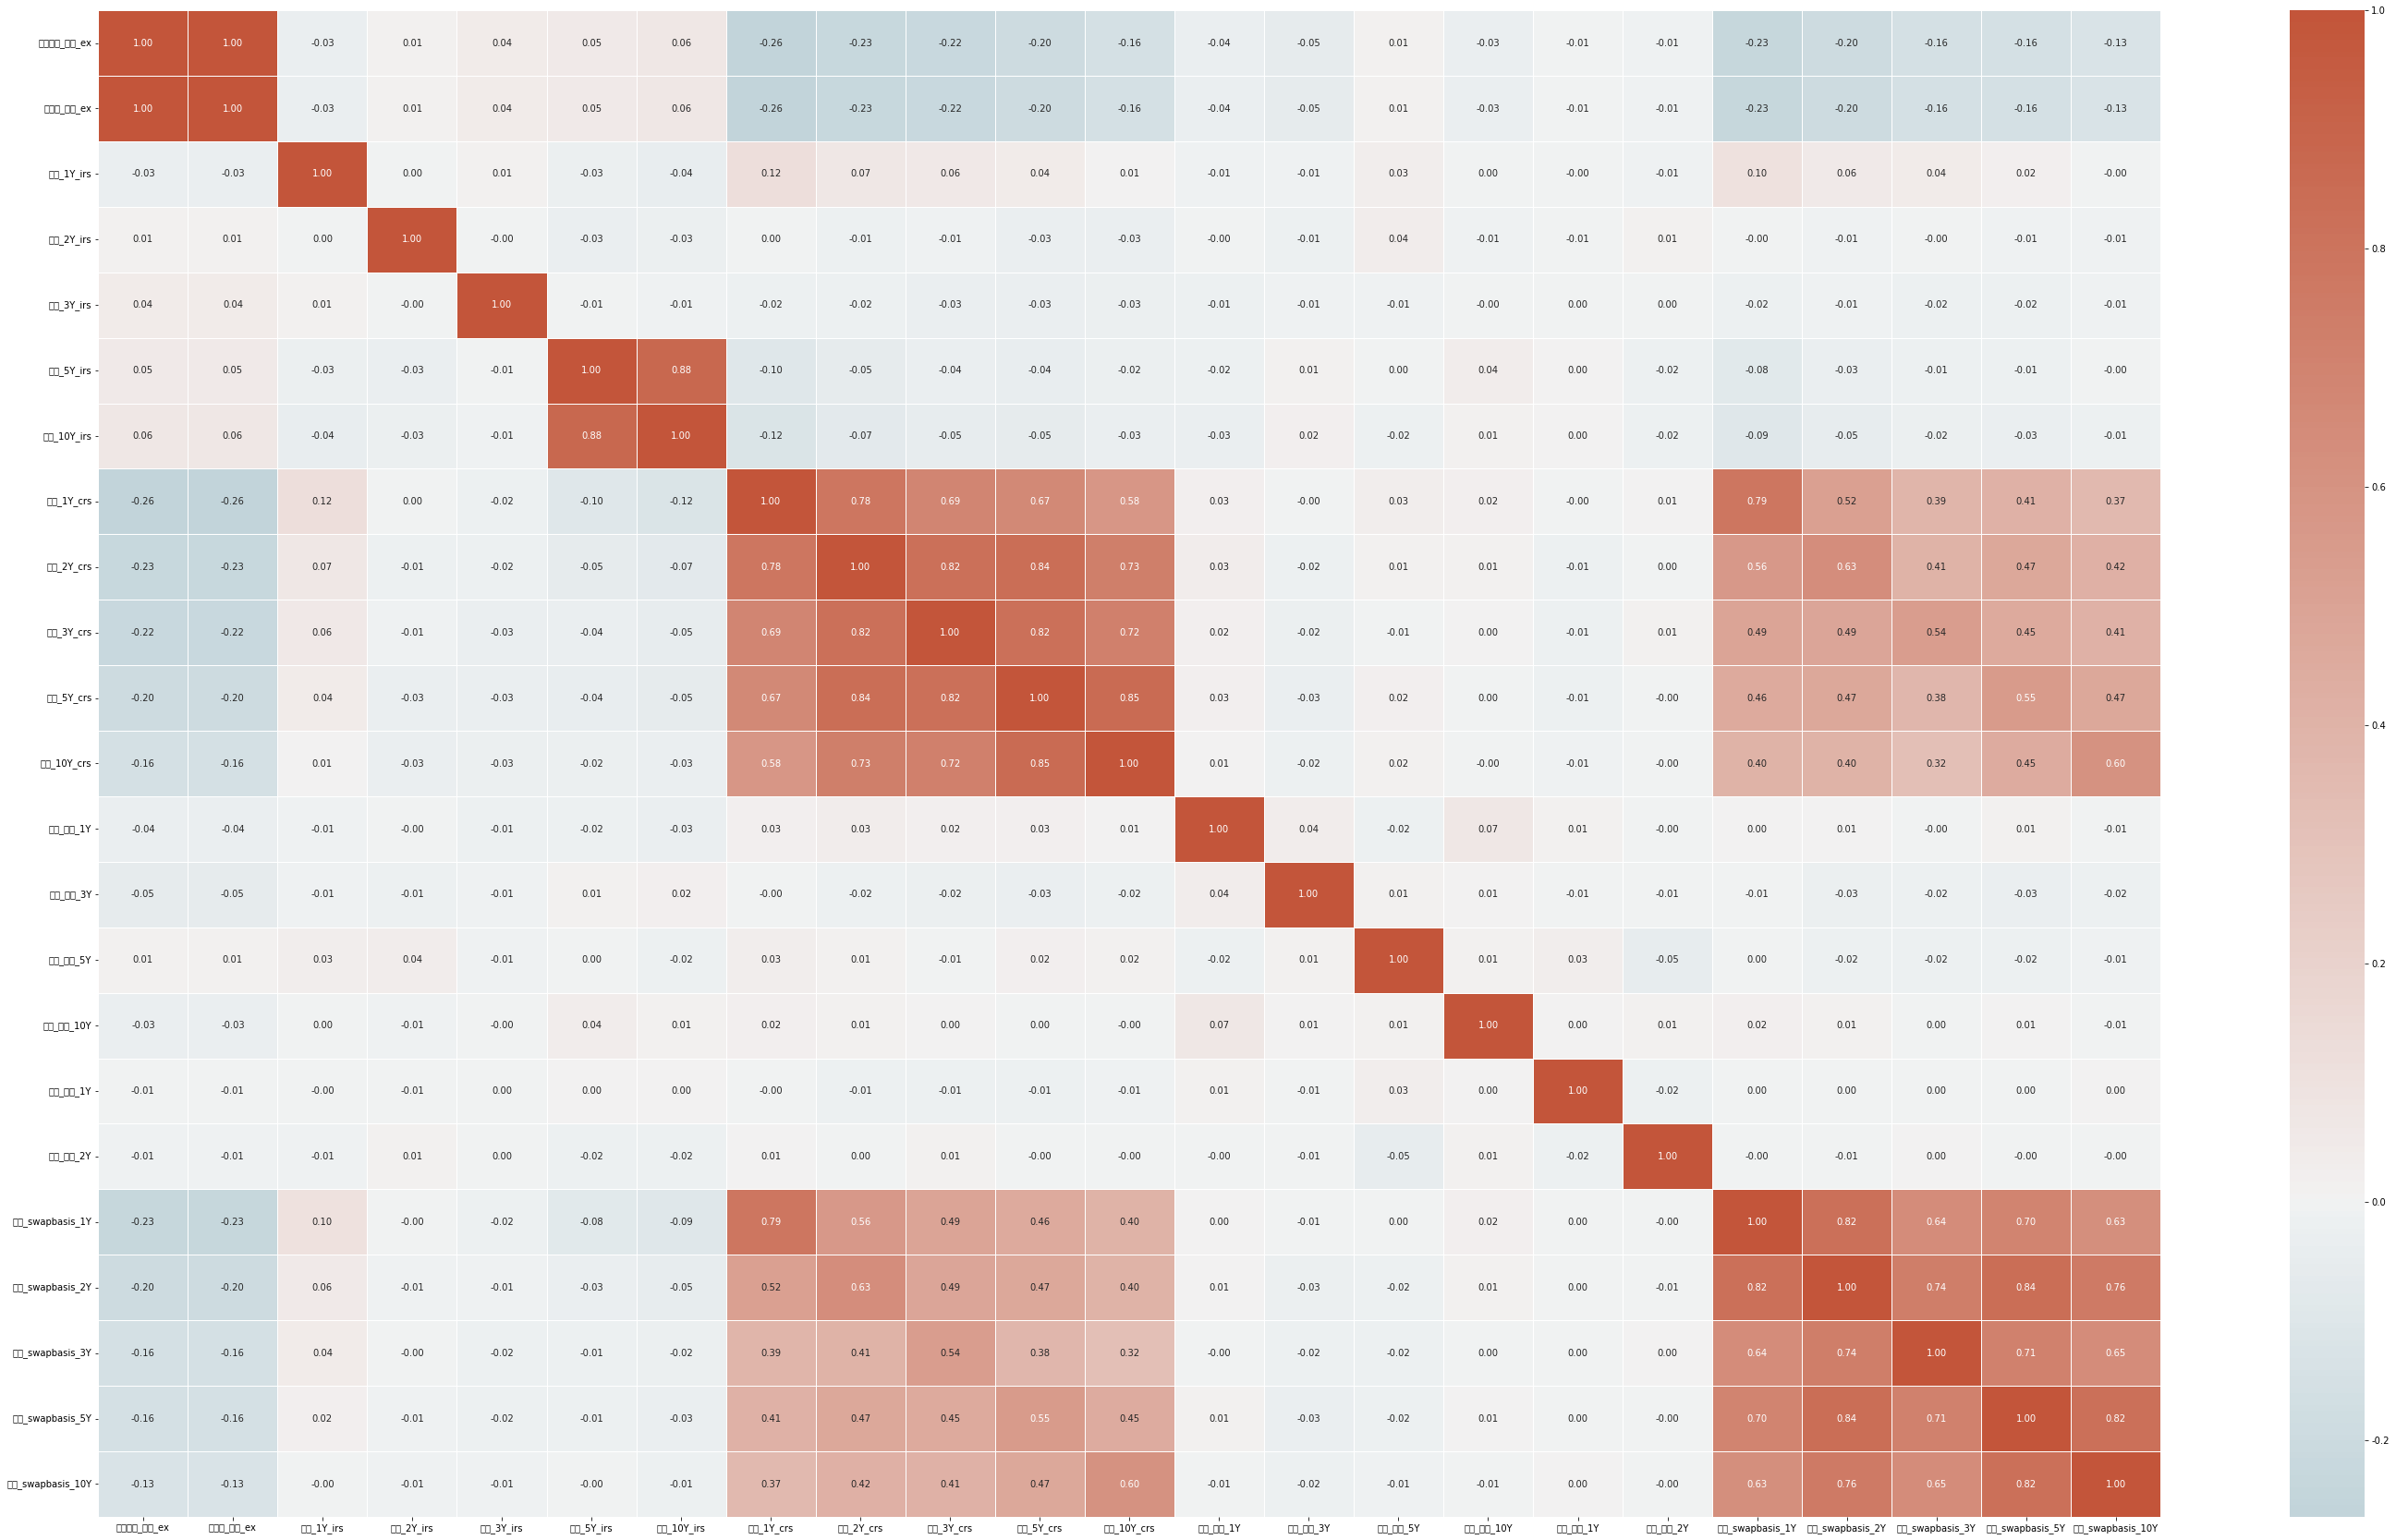

In [148]:
# 히트맵 그리기
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp 
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(50,30))

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data = df_1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [ ]:
ktb_all

,index,DateTime,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안1년대비,통안2년대비
0,0,2002-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-08-02,-0.07,-0.09,-0.08,NaN,-0.07,-0.09
2,2,2002-08-05,-0.09,-0.13,-0.21,NaN,-0.09,-0.14
3,3,2002-08-06,0.05,0.06,0.05,NaN,0.05,0.05
4,4,2002-08-07,-0.02,-0.02,-0.05,NaN,-0.02,0.00
...,...,...,...,...,...,...,...,...
4947,2455,2022-07-25,-0.02,-0.06,-0.07,-0.09,-0.01,-0.05
4948,2456,2022-07-26,0.01,-0.03,-0.02,-0.03,0.01,0.00
4949,2457,2022-07-27,0.00,-0.03,-0.05,-0.06,0.02,-0.01
4950,2458,2022-07-28,0.01,0.04,0.03,0.08,0.02,0.03
